# Исследование объявлений о продаже квартир

В распоряжении имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem
m = Mystem()
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В таблице 22 столбца:  
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

3 столбца содержат логические переменные: *is_apartment, open_plan, studio*, 1 столбец - качественные переменные: *locality_name*, 1 столбец содержит дату - *first_day_exposition*, все остальные - количественные переменные.

Типы данных следующих столбцов не соответствуют их содержимому: 
* *first_day_exposition* - значения в столбце необходимо перевести в формат даты, 
* *floors_total* - количество этажей должно быть целым числом,  
* *is_apartment* - из описания столбец должен иметь булев тип данных, 
* *balcony* - число балконов должно быть целым числом, 
* *parks_around3000* - количество парков заменим на целые числа, 
* *ponds_around3000* - количество водоемов заменим на целые числа.  

Копейки в цене квартиры, см в расстояниях до ближайшего парка, аэропорта, центра города нас не интересуют, поэтому в следующих столбцах можно заменить тип данных с вещественного на целочисленный: *last_price, airports_nearest, cityCenters_nearest, parks_nearest*. Это сэкономит место и время на обработку.

Во многих столбцах таблицы есть отсутствующие значения. Необходимо изучить и обработать эти пропуски.

### Вывод

Таблица содержит 23699 строк - объявлений о продаже квартир. Перед изучением параметров, определяющих рыночную стоимость квартиры, необходимо:
* обработать пропуски,
* изменить типы данных.

### Шаг 2. Предобработка данных

#### Обработка пропусков

В следующих столбцах пояление пропусков можно объяснить не заполнением полей объявлений пользователями:
* ceiling_height, 
* floors_total, 
* living_area, 
* is_apartment, 
* kitchen_area,
* balcony,
* locality_name.  

Столбцы *living_area* и *kitchen_area* не участвуют в исследовании, поэтому оставим их неизменными.  
Логичную замену можно предположить для столбца *balcony*: если человек не указал число балконов — скорее всего, их нет. Такие пропуски заменим на 0.   
Пропуски в столбце *ceiling_height* можно заменить на среднее значение высоты потолка в домах определенной этажности. Высота потолка различается в квартирах старого фонда(обычно дома низкой этажности и высокими потолками до 4 метров), хрущевках(обычно 5 этажей) - высота 2,45 - 2,6 м, сталинках(6-12 этажей) - высота 2,9 - 3,2 м.  
Для пропусков в столбцах *floors_total*, *is_apartment* нет подходящих значений на замену.  
Т.к. исследование предполагает изучение расположения квартиры, а также пропуски в столбце *locality_name* составляют лишь 0,2%, то удалим строки с пропусками в этом столбце.

Заполним пропуски в столбце *balcony*.

In [3]:
df['balcony'] = df['balcony'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Заполним пропуски в столбце *ceiling_height*.

In [4]:
df['ceiling_height'].isnull().value_counts()

False    14504
True      9195
Name: ceiling_height, dtype: int64

In [5]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Высота потолка колеблется от 1 до 100 м. Здесь явно присутствует ошибка при вводе данных: необходимо добавить проверки заполнения данного поля при ручном вводе данных. Реалистичной кажется высота потолка от 2 до 4 метров. Этот диапазон возьмем для исследования средней высоты для разной этажности домов.

In [6]:
ceiling_height_groupped = df.query('2 < ceiling_height < 4').groupby('floors_total')['ceiling_height'].mean()
ceiling_height_groupped

floors_total
1.0     2.740000
2.0     2.781148
3.0     2.855155
4.0     2.927399
5.0     2.696740
6.0     3.049818
7.0     2.917238
8.0     2.840826
9.0     2.580204
10.0    2.652737
11.0    2.782385
12.0    2.642938
13.0    2.715470
14.0    2.640235
15.0    2.718036
16.0    2.726206
17.0    2.713640
18.0    2.707153
19.0    2.778731
20.0    2.756859
21.0    2.711692
22.0    2.731560
23.0    2.753776
24.0    2.737454
25.0    2.730192
26.0    2.671698
27.0    2.675556
28.0    2.594444
29.0    2.600000
34.0    2.650000
35.0    2.710000
36.0    2.700000
52.0    2.650000
60.0    2.880000
Name: ceiling_height, dtype: float64

Хорошо видна разница в 5 и 6 этажей, хрущевок и сталинок соответственно. Заменим пропуски на найденные средние значения.

In [7]:
floors_total_index = ceiling_height_groupped.index.tolist()
for floors in floors_total_index:
    mask = (df['ceiling_height'].isnull()) & (df['floors_total'] == floors)
    df.loc[mask, 'ceiling_height'] = ceiling_height_groupped[floors]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23621 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [8]:
df[df['ceiling_height'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Высота потолка не заполнилась в 78 строках с неизвестным количеством этажей в доме.

Удалим строки с пропусками в столбце *locality_name*.

In [9]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23573 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

Пропуски есть во всех столбцах, данные которых получены автоматически на основе картографических данных:
* airports_nearest,
* cityCenters_nearest,
* parks_around3000,
* parks_nearest,
* ponds_around3000,
* ponds_nearest.

Большое количество пропусков в столбцах *parks_around3000* и *ponds_around3000*: возможно поблизости нет парков и водоемов.  
В *airports_nearest* и *cityCenters_nearest* близко количество пропущенных значений. Предположим, что подсчитано только для СПб и населенных пунктов, которые входят в состав СПб. Проверим на Сестрорецке (входит в СПб и далеко от аэропорта) и Коммунар(не входит в СПб и близко к аэропорту).

In [10]:
df[df['airports_nearest'].isnull() & df['cityCenters_nearest'].isnull()]['total_area'].count()

5510

In [11]:
df[df['airports_nearest'].isnull() & df['cityCenters_nearest'].isnull()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.642938,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.675556,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.696740,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.750000,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.580204,9.0,NaN,2,NaN,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.500000,5.0,NaN,1,NaN,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.750000,18.0,16.30,9,NaN,...,11.60,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.927399,4.0,42.50,3,NaN,...,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.642938,12.0,NaN,8,NaN,...,NaN,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.800000,9.0,48.80,5,NaN,...,11.90,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [12]:
sestroreck_total = len(df[df['locality_name'] == 'Сестрорецк'])
sestroreck_null = len(df[(df['locality_name'] == 'Сестрорецк') & (df['airports_nearest'].isnull())])
kommunar_total = len(df[df['locality_name'] == 'Коммунар'])
kommunar_null = len(df[(df['locality_name'] == 'Коммунар') & (df['airports_nearest'].isnull())])
print('Объявлений в Сестрорецке всего {}, из них с пропущенными значениями в геоданных - {}.'.format(sestroreck_total, sestroreck_null))
print('Объявлений в Коммунар всего {}, из них с пропущенными значениями в геоданных - {}.'.format(kommunar_total, kommunar_null))

Объявлений в Сестрорецке всего 183, из них с пропущенными значениями в геоданных - 0.
Объявлений в Коммунар всего 89, из них с пропущенными значениями в геоданных - 89.


Возможно отсутствие геоданных связано также с некорректными названиями населенных пунктов, например, в срезе с пустыми значениями есть "посёлок Мурино", которого сейчас не существует(получил статус города в 2019 году). Проверим это при поиске дубликатов.

### Вывод

Обработали пропуски в столбцах *balcony*: пропуски заменили на 0; *ceiling_height*: заменили на среднее значение высоты потолка в домах определенной этажности.  
Удалили строки с пропусками в столбце *locality_name*.

#### Поиск дубликатов

Найдем повторяющиеся значения в столбце *locality_name* с помощью лемматизации.

In [13]:
locality_n = df['locality_name'].unique()
locality_n

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [14]:
lemmas = m.lemmatize(' '.join(locality_n))
' '.join(locality_n)

'Санкт-Петербург посёлок Шушары городской посёлок Янино-1 посёлок Парголово посёлок Мурино Ломоносов Сертолово Петергоф Пушкин деревня Кудрово Коммунар Колпино поселок городского типа Красный Бор Гатчина поселок Мурино деревня Фёдоровское Выборг Кронштадт Кировск деревня Новое Девяткино посёлок Металлострой посёлок городского типа Лебяжье посёлок городского типа Сиверский поселок Молодцово поселок городского типа Кузьмоловский садовое товарищество Новая Ропша Павловск деревня Пикколово Всеволожск Волхов Кингисепп Приозерск Сестрорецк деревня Куттузи посёлок Аннино поселок городского типа Ефимовский посёлок Плодовое деревня Заклинье поселок Торковичи поселок Первомайское Красное Село посёлок Понтонный Сясьстрой деревня Старая деревня Лесколово посёлок Новый Свет Сланцы село Путилово Ивангород Мурино Шлиссельбург Никольское Зеленогорск Сосновый Бор поселок Новый Свет деревня Оржицы деревня Кальтино Кудрово поселок Романовка посёлок Бугры поселок Бугры поселок городского типа Рощино Кириш

In [15]:
from collections import Counter
Counter(lemmas)

Counter({'санкт-петербург': 1,
         ' ': 847,
         'поселок': 201,
         'шушар': 1,
         'городской': 53,
         'янино': 2,
         '-': 12,
         '1': 2,
         'парголовый': 1,
         'муриный': 3,
         'ломоносов': 1,
         'сертолово': 1,
         'петергоф': 1,
         'пушкин': 1,
         'деревня': 106,
         'кудрово': 2,
         'коммунар': 2,
         'колпино': 1,
         'тип': 39,
         'красный': 5,
         'бор': 8,
         'гатчина': 1,
         'федоровский': 2,
         'выборг': 1,
         'кронштадт': 1,
         'кировск': 1,
         'новый': 6,
         'девяткино': 1,
         'металлострой': 1,
         'лебяжий': 2,
         'сиверский': 1,
         'молодцов': 1,
         'кузьмоловский': 2,
         'садовый': 4,
         'товарищество': 5,
         'ропша': 2,
         'павловск': 1,
         'пикколово': 1,
         'всеволожск': 1,
         'волхов': 1,
         'кингисепп': 1,
         'приозерск': 1,
      

Проверим несколько первых повторяющихся лемм - 'янино': 2, 'муриный': 3, 'кудрово': 2, 'коммунар': 2.

In [16]:
df[df['locality_name'].str.contains(r'Янино')]['locality_name'].unique()

array(['городской посёлок Янино-1', 'городской поселок Янино-1'],
      dtype=object)

In [17]:
df[df['locality_name'].str.contains(r'Кудрово')]['locality_name'].unique()

array(['деревня Кудрово', 'Кудрово'], dtype=object)

In [18]:
df[df['locality_name'].str.contains(r'Мурино')]['locality_name'].unique()

array(['посёлок Мурино', 'поселок Мурино', 'Мурино'], dtype=object)

In [19]:
df[df['locality_name'].str.contains(r'Коммунар')]['locality_name'].unique()

array(['Коммунар', 'поселок Коммунары'], dtype=object)

Проблема разных наименований скорее всего связана с использованием разных версий справочников населенных пунктов. Вопрос использования одного справочника с версионностью необходимо рассмотреть с командой разработки.

Проверим ниличие полных дубликатов.

In [20]:
df.duplicated().sum()

0

### Вывод

Сделали предположение о появлении дубликатов в столбце *locality_name*. Используем его при исследовательском анализе данных.

#### Замена типа данных

В Шаге 1 выделены следующие столбцы для изменения типа данных на целочисленный:  
* floors_total,   
* balcony, 
* parks_around3000, 
* ponds_around3000,  
* last_price, 
* airports_nearest, 
* cityCenters_nearest, 
* parks_nearest.

Изменим тип данных в столбцах без пропусков c вещественного на целочисленный. Воспользуемся методом astype(), который переводит значения в нужный тип. Проверим полученный результат, вызвав метод info().

In [21]:
df['balcony'] = df['balcony'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23573 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000   

Для удобства расчетов переведем цену квартиры в миллионы.

In [22]:
df['last_price'] = df['last_price'] / 1000000
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.350,40.4,2018-12-04T00:00:00,1,2.782385,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.0,2015-08-20T00:00:00,2,2.696740,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.900,159.0,2015-07-24T00:00:00,3,2.640235,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10.000,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Переведем в формат даты данные столбца *first_day_exposition*.

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23573 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_aro

### Вывод

Заменили тип данных с вещественного на целочисленный в столбцах *balcony* и *last_price*.  
Перевели цены на квартиры в миллионы.  
Перевели значения в столбце *first_day_exposition* в формат даты.

### Шаг 3. Посчитайте и добавьте в таблицу

#### Цена квадратного метра

In [24]:
df['price'] = df['last_price'] / df['total_area'] * 1000000
df['price'] = df['price'].astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price
0,20,13.000,108.0,2019-03-07,3,2.700000,16.0,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,7,3.350,40.4,2018-12-04,1,2.782385,11.0,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5.196,56.0,2015-08-20,2,2.696740,5.0,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,0,64.900,159.0,2015-07-24,3,2.640235,14.0,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10.000,100.0,2018-06-19,2,3.030000,14.0,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


#### День недели, месяц и год публикации

In [25]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year
0,20,13.000,108.0,2019-03-07,3,2.700000,16.0,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
1,7,3.350,40.4,2018-12-04,1,2.782385,11.0,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5.196,56.0,2015-08-20,2,2.696740,5.0,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
3,0,64.900,159.0,2015-07-24,3,2.640235,14.0,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
4,2,10.000,100.0,2018-06-19,2,3.030000,14.0,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018


#### Этаж квартиры: первый, последний, другой

In [26]:
def get_floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [27]:
df['floor_group'] = df.apply(lambda row: get_floor_group(row), axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,floor_group
0,20,13.000,108.0,2019-03-07,3,2.700000,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3.350,40.4,2018-12-04,1,2.782385,11.0,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5.196,56.0,2015-08-20,2,2.696740,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,0,64.900,159.0,2015-07-24,3,2.640235,14.0,NaN,9,NaN,...,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,2,10.000,100.0,2018-06-19,2,3.030000,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой


#### Cоотношение жилой и общей площади, а также отношение площади кухни к общей

In [28]:
df['living_area_rate'] = df['living_area'] / df['total_area']
df['kitchen_area_rate'] = df['kitchen_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,floor_group,living_area_rate,kitchen_area_rate
0,20,13.000,108.0,2019-03-07,3,2.700000,16.0,51.0,8,NaN,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3.350,40.4,2018-12-04,1,2.782385,11.0,18.6,1,NaN,...,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5.196,56.0,2015-08-20,2,2.696740,5.0,34.3,4,NaN,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64.900,159.0,2015-07-24,3,2.640235,14.0,NaN,9,NaN,...,3.0,234.0,424.0,408176,4,7,2015,другой,NaN,NaN
4,2,10.000,100.0,2018-06-19,2,3.030000,14.0,32.0,13,NaN,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


### Вывод

Добавили в таблицу столбцы:
* *price* - цена квадратного метра в единицах,
* *weekday* - неделя публикации объявления,
* *month* - месяц публикации объявления,
* *year* - год публикации объявления,
* *living_area_rate* - отношение жилой площади к общей, 
* *kitchen_area_rate* - отношение площади кухни к общей.

### Шаг 4. Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

**Площадь**

In [29]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

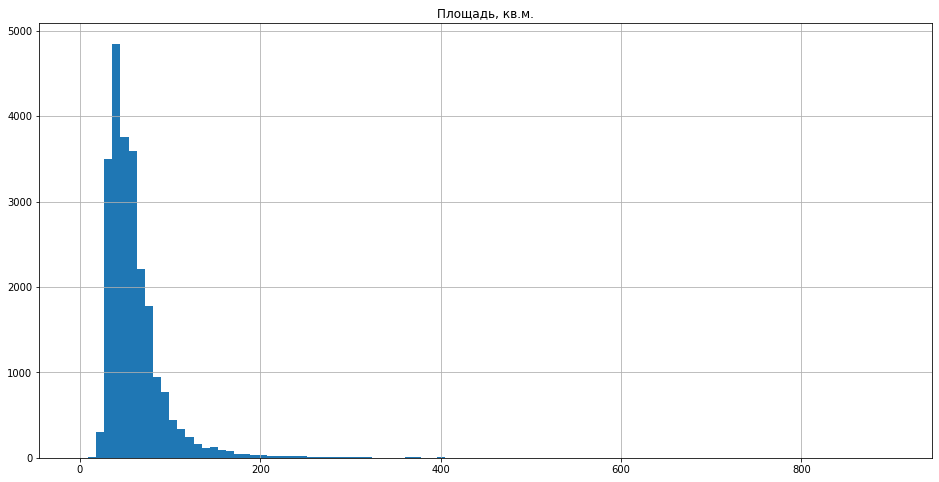

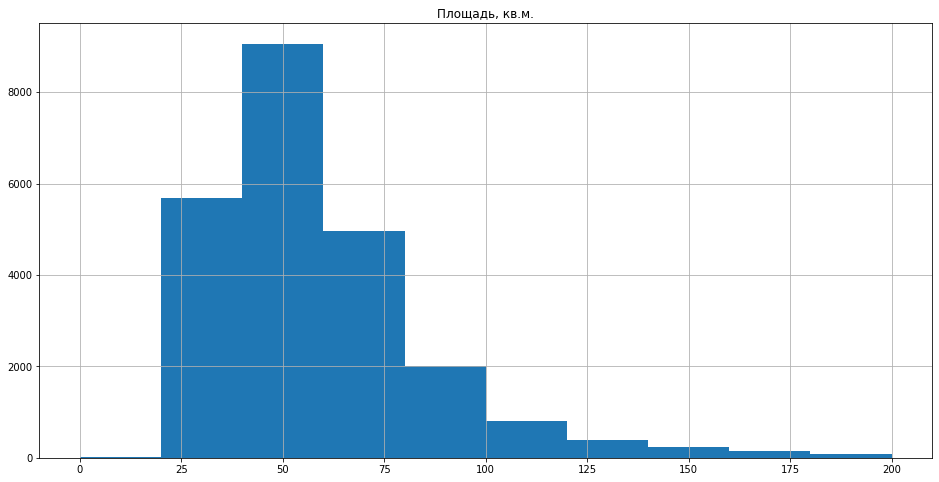

In [30]:
hist_info = [[100, 0, 900],
             [10, 0, 200]]
for row in hist_info:
    df['total_area'].hist(bins = row[0], range = (row[1],row[2]), figsize = (16,8))
    plt.title('Площадь, кв.м.')
    plt.show()

Площадь большинства квартир находится в диапазоне от 25 до 100 квадратных метров. Больше всего квартир в продаже площадью около 50 квадратных метров.  
Значения до 20 и после 200 можно считать редкими.

**Цена**

In [31]:
df['last_price'].describe()

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

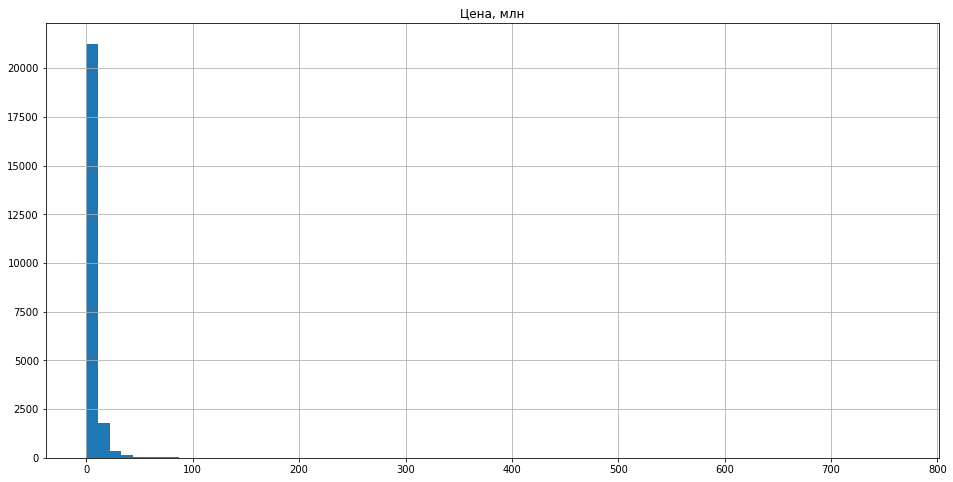

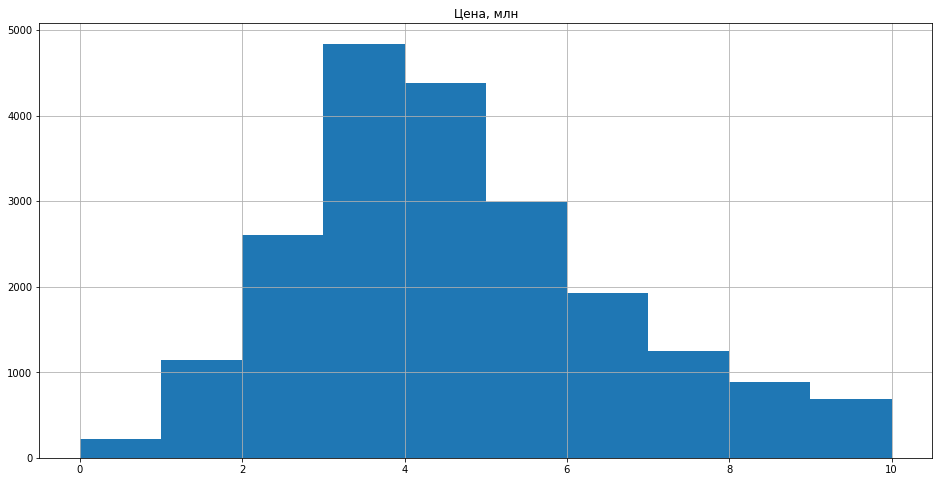

In [32]:
hist_info = [[70, 0, 763],
             [10, 0, 10]]
for row in hist_info:
    df['last_price'].hist(bins = row[0], range = (row[1],row[2]), figsize = (16,8))
    plt.title('Цена, млн')
    plt.show()

Цена большинства квартир находится в диапазоне до 10 миллионов. Больше всего квартир в продаже имели цену около 4 миллионов.  
Значения до 1 или больше 20 миллионов можно считать редкими.

**Число комнат**

In [33]:
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

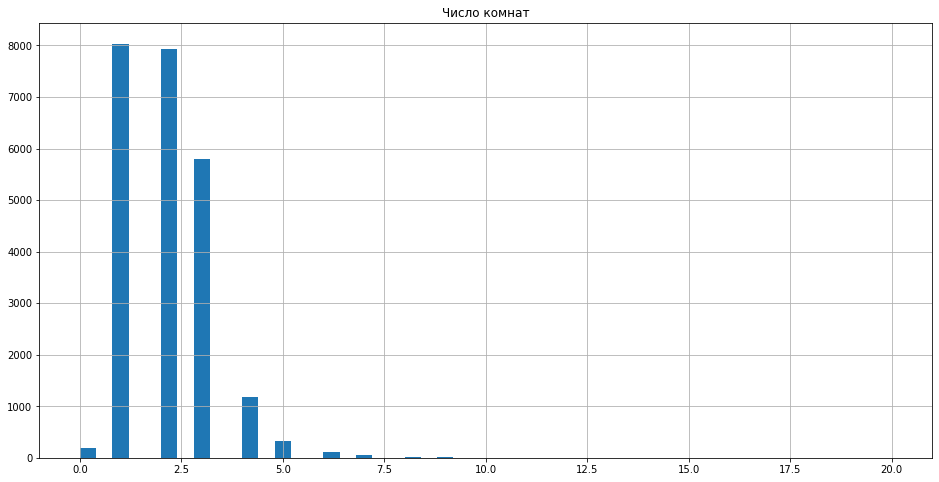

In [34]:
df['rooms'].hist(bins=50, range = (0,20), figsize=(16,8))
plt.title('Число комнат')
plt.show()

Однокомнатных и двухкомнатных квартир в продаже больше всего, чуть меньше трехкомнатных.  
Квартиры с количеством комнат больше 7 можно считать редкими.

**Высота потолков**

In [35]:
df['ceiling_height'].describe()

count    23573.000000
mean         2.751967
std          0.991494
min          1.000000
25%          2.580204
50%          2.696740
75%          2.778731
max        100.000000
Name: ceiling_height, dtype: float64

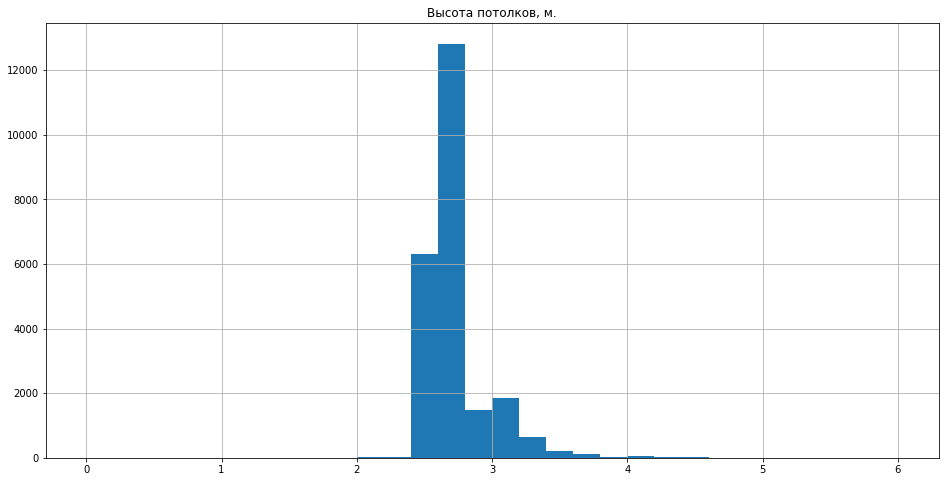

In [36]:
df['ceiling_height'].hist(bins=30, range = (0,6), figsize=(16,8))
plt.title('Высота потолков, м.')
plt.show()

Высота потолков большинства квартир находится в диапазоне от 2,4 до 3,4 метра.   
Значения до 2,4 и после 3,8 можно считать редкими.

### Вывод

Средняя квартира в продаже имеет следующие характеристики: двухкомнатная квартира площадью 53 кв.м., с высотой потолков 2,7 метров, проданная по цене 4,65 миллионов.

Изучим время продажи квартиры, построим гистограмму. Посчитаем среднее и медиану. Сколько обычно занимает продажа? Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?


In [37]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи 180 дней намного больше медианы - 95 дней. Чтобы понять причину этого, построим гистограмму.

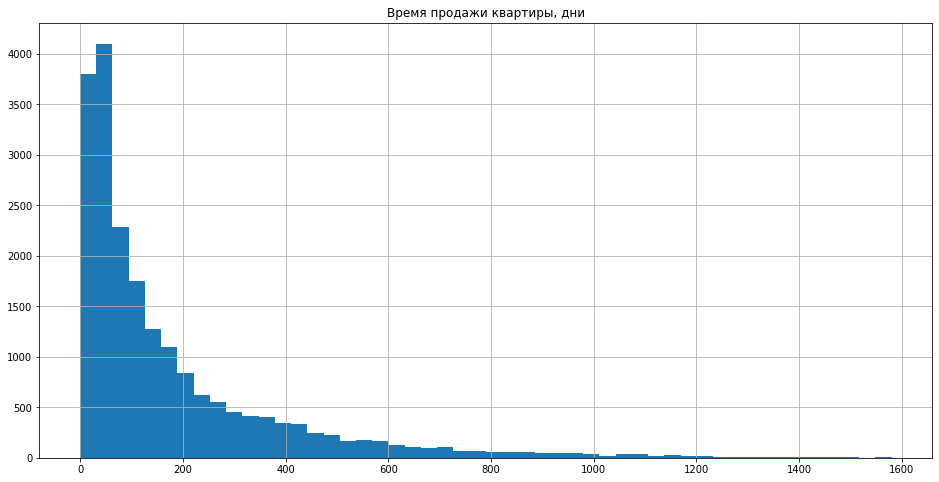

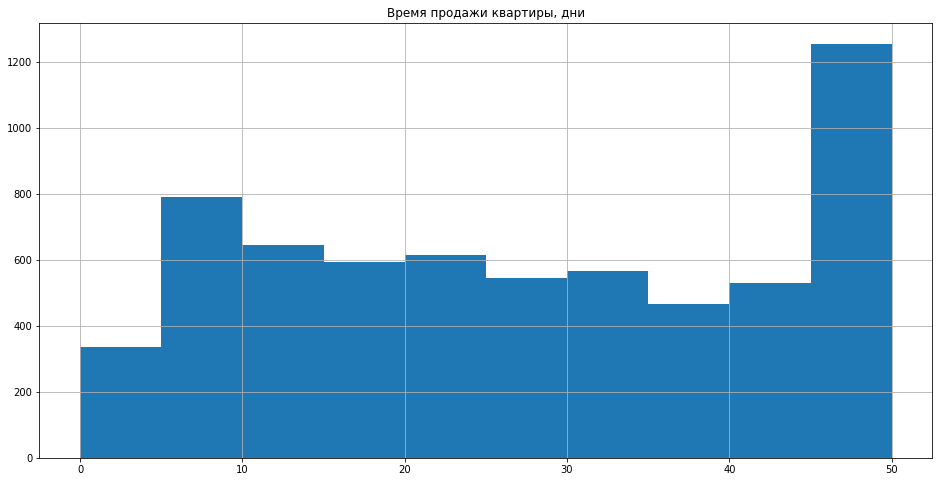

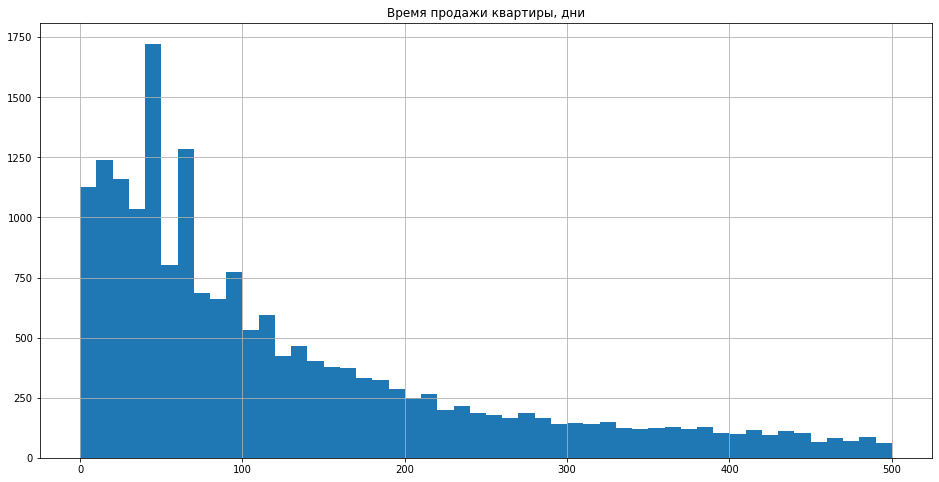

In [38]:
hist_info = [[50, 0, 1580],
             [10, 0, 50],
             [50, 0, 500]]
for row in hist_info:
    df['days_exposition'].hist(bins = row[0], range = (row[1],row[2]), figsize = (16,8))
    plt.title('Время продажи квартиры, дни')
    plt.show()

Гистограмма времени продаж имеет длинный хвост. Значения после 800 дней уже редки, но тянутся до 1580 дней. 

На последней гистограмме видно 2 выбивающихся значения - около 40 и 60 дней. 

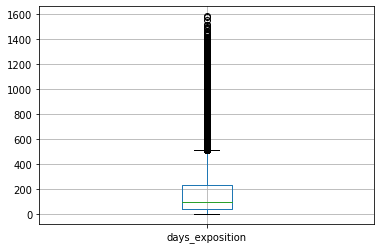

In [39]:
df.boxplot('days_exposition')
plt.show()

### Вывод

Чаще всего продажа квартиры занимает - 95 дней. При этом больше 500 дней будем считать необычно долгими продажами, до 5 - очень быстрыми. 

Рассмотрим выбивающиеся значениям, обнаруженные в количестве дней продажи квартиры.

In [40]:
df.query('40 < days_exposition < 50').pivot_table(index='days_exposition',values='last_price', aggfunc='count')

,last_price
days_exposition,
41.0,76
42.0,115
43.0,107
44.0,138
45.0,879
46.0,91
47.0,77
48.0,78
49.0,69


In [41]:
df.query('50 < days_exposition < 70').pivot_table(index='days_exposition',values='last_price', aggfunc='count')

,last_price
days_exposition,
51.0,52
52.0,84
53.0,81
54.0,110
55.0,75
56.0,86
57.0,74
58.0,72
59.0,106


879 квартир было продано за 45 дней и 538 квартир за 60 дней. Уберем выбивающиеся значения из таблицы.

Редкими значениями будем считать:
* площадь квартиры меньше 20 или больше 200,
* цена меньше 1 или больше 20 миллионов,
* комнат больше 7,
* высота потолков ниже 2,4 или выше 3,8,
* время продажи больше 800 дней.

In [42]:
good_data = df.query(
    '20 <= total_area <= 200 and 1 <= last_price <= 20 and rooms <= 7 and 2.4 <= ceiling_height <= 3.8 and days_exposition != 45 and days_exposition != 60 and days_exposition <= 800'
)
good_data.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18479 entries, 1 to 23648
Data columns (total 29 columns):
total_images            18479 non-null int64
last_price              18479 non-null float64
total_area              18479 non-null float64
first_day_exposition    18479 non-null datetime64[ns]
rooms                   18479 non-null int64
ceiling_height          18479 non-null float64
floors_total            18474 non-null float64
living_area             17152 non-null float64
floor                   18479 non-null int64
is_apartment            2246 non-null object
studio                  18479 non-null bool
open_plan               18479 non-null bool
kitchen_area            16800 non-null float64
balcony                 18479 non-null int64
locality_name           18479 non-null object
airports_nearest        14225 non-null float64
cityCenters_nearest     14241 non-null float64
parks_around3000        14241 non-null float64
parks_nearest           6046 non-null float64
ponds_aro

In [43]:
good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,living_area_rate,kitchen_area_rate
count,18479.000000,18479.000000,18479.000000,18479.000000,18479.000000,18474.0000,17152.000000,18479.000000,16800.000000,18479.000000,...,6046.000000,14241.000000,6886.000000,18479.000000,18479.000000,18479.000000,18479.000000,18479.000000,17152.000000,16800.000000
mean,9.625683,5.227874,55.077746,1.954543,2.704034,10.9692,31.458242,6.007901,9.966346,0.602792,...,489.958485,0.726915,529.096137,156.686509,94371.172195,2.576600,6.595324,2017.276638,0.562093,0.190490
std,5.599052,2.982131,22.634951,0.949699,0.183458,6.6537,15.449187,4.945546,4.414072,0.953131,...,339.667869,0.910495,276.814129,165.346551,30727.820361,1.780785,3.473633,0.907505,0.104275,0.071703
min,0.000000,1.000000,20.000000,0.000000,2.400000,1.0000,2.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,10507.000000,0.000000,1.000000,2014.000000,0.038462,0.043524
25%,6.000000,3.350000,39.000000,1.000000,2.580204,5.0000,18.000000,2.000000,7.000000,0.000000,...,287.000000,0.000000,311.000000,42.000000,76213.500000,1.000000,3.000000,2017.000000,0.491228,0.136364
50%,9.000000,4.400000,49.700000,2.000000,2.696740,9.0000,29.300000,4.000000,9.000000,0.000000,...,455.000000,0.000000,517.000000,94.000000,93333.000000,3.000000,7.000000,2017.000000,0.564627,0.176471
75%,14.000000,6.200000,65.000000,3.000000,2.750000,16.0000,40.000000,8.000000,11.302500,1.000000,...,613.000000,1.000000,740.000000,214.000000,110267.000000,4.000000,10.000000,2018.000000,0.634928,0.235849
max,50.000000,20.000000,200.000000,7.000000,3.800000,60.0000,159.600000,33.000000,64.000000,5.000000,...,3190.000000,3.000000,1344.000000,800.000000,392354.000000,6.000000,12.000000,2019.000000,1.000000,0.787879


In [44]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,living_area_rate,kitchen_area_rate
count,23650.000000,23650.000000,23650.000000,23650.000000,23573.000000,23565.000000,21752.000000,23650.000000,21381.000000,23650.000000,...,8064.000000,18140.000000,9085.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,21752.000000,21381.000000
mean,9.862326,6.541127,60.329069,2.070106,2.751967,10.675875,34.448356,5.893277,10.566403,0.591712,...,490.830729,0.769680,518.059879,180.753200,9.943179e+04,2.568710,6.401564,2017.370021,0.564750,0.187372
std,5.682278,10.896399,35.661808,1.078620,0.991494,6.594823,22.037664,4.883317,5.901753,0.959662,...,342.554386,0.937948,277.841733,219.777916,5.033794e+04,1.788808,3.491418,1.037806,0.105385,0.072972
min,0.000000,0.012190,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000,40.000000,1.000000,2.580204,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,45.000000,7.661425e+04,1.000000,3.000000,2017.000000,0.495157,0.133333
50%,9.000000,4.650000,52.000000,2.000000,2.696740,9.000000,30.000000,4.000000,9.100000,0.000000,...,454.500000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.567860,0.172414
75%,14.000000,6.799000,69.700000,3.000000,2.778731,16.000000,42.300000,8.000000,12.000000,1.000000,...,612.000000,1.000000,730.000000,231.000000,1.142740e+05,4.000000,10.000000,2018.000000,0.637778,0.232432
max,50.000000,763.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


### Вывод

Из таблицы убраны редкие и выбивающиеся значения: осталось 78% данных. При этом медианные значения изменились не намного. Например, медиана цены квартиры упала с 4,65 до 4,4, медиана площади - с 52 до 49,7.

#### Какие факторы больше всего влияют на стоимость квартиры? 

Изучим зависит ли стоимость квартиры от площади, числа комнат, удалённости от центра.

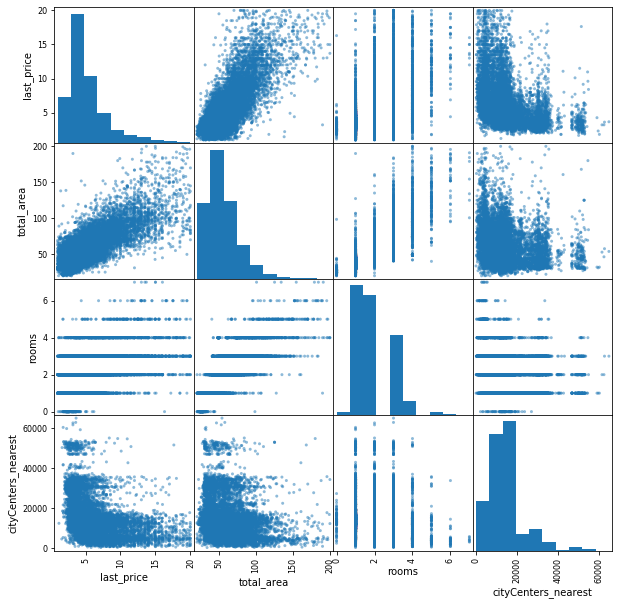

In [45]:
pd.plotting.scatter_matrix(good_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(10, 10))
plt.show()

In [46]:
good_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()[['last_price']]

,last_price
last_price,1.000000
total_area,0.773726
rooms,0.508017
cityCenters_nearest,-0.357083


Самая сильная взаимосвязь между ценой и площадью квартиры: коэффициент корреляции 0,77. С ростом количества комнат растет и стоимость квартиры - коэффициент корреляции 0,5. Чем дальше квартира от центра, тем меньше ее стоимость: коэффициент корреляции -0,36.
Рассмотрим влияние факторов на цену квадратного метра квартиры.

In [47]:
good_data[['price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()[['price']]

,price
price,1.000000
total_area,0.043276
rooms,-0.142185
cityCenters_nearest,-0.396847


На цену квадратного метра общая площадь и количество комнат практически не влияют. Зато удаленность от центра по прежнему влияет на цену: коэффициент корреляции -0,4.

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [48]:
good_data.groupby(['floor_group'])['price'].agg(['mean','median', 'count'])

,mean,median,count
floor_group,,,
другой,97844.779206,96363.0,13773
первый,80366.902428,80448.5,2224
последний,87644.140210,87111.0,2482


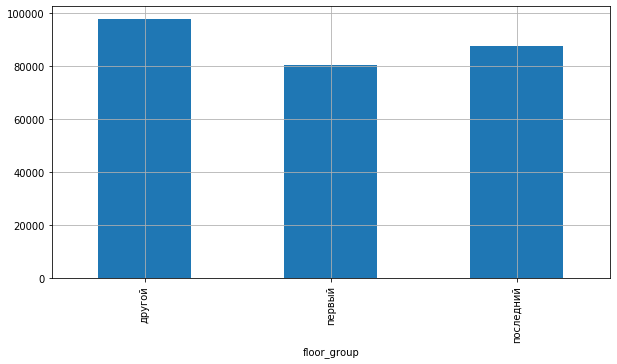

In [49]:
good_data.groupby(['floor_group'])['price'].agg('mean').plot(kind='bar',grid=True,figsize=(10,5))
plt.show()

Квартиры на первом этаже самые дешевые: средняя цена квадратного метра - 80367, на втором месте по стоимости - квартиры на последнем этаже - 87644. Средняя стоимость квадратного метра остальных квартир - 97845.

Изучим зависимость от даты размещения: дня недели, месяца и года.

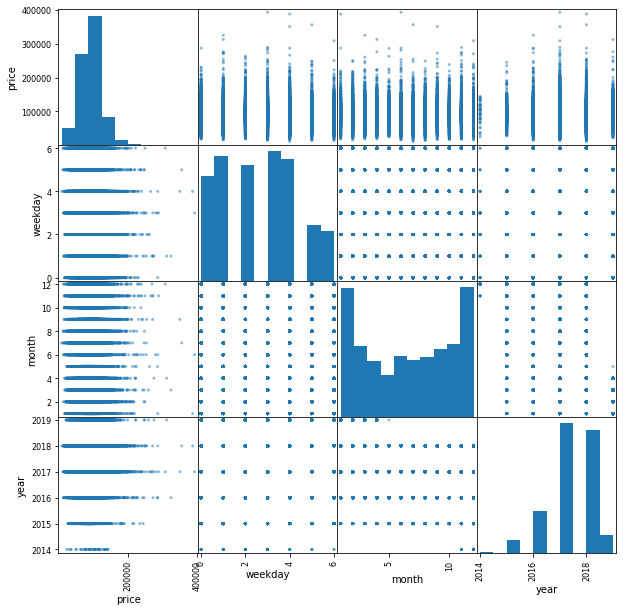

In [50]:
pd.plotting.scatter_matrix(good_data[['price', 'weekday', 'month', 'year']], figsize=(10, 10))
plt.show()

In [51]:
good_data[['price', 'weekday', 'month', 'year']].corr()[['price']]

,price
price,1.000000
weekday,-0.005210
month,0.003349
year,0.059820


На графике зависимости цены от года размещения объявления можно заметить, что диапазон цен на квартиры увеличивался с 2014 по 2017 год, но с 2018 начал уменьшаться. Хотя зависимость цена квартиры от даты размещения объявления о продаже очень слабая.

### Вывод

Чем больше площадь квартиры или количество комнат (что также подразумевает увеличение площади), тем естественно выше стоимость квартиры.  
На стоимость квадратного метра больше всего влияет удаленность от центра города и то, на каком этаже расположена квартира: первом, последнем или другом.

#### 10 населённых пунктов с наибольшим числом объявлений

Найдем 10 населённых пунктов с наибольшим числом объявлений.

In [52]:
top_locations = good_data.pivot_table(index='locality_name', values='total_images', aggfunc='count').reset_index().sort_values('total_images', ascending=False).head(10)
top_locations

,locality_name,total_images
32,Санкт-Петербург,12189
235,посёлок Мурино,490
265,посёлок Шушары,388
3,Всеволожск,320
13,Колпино,296
239,посёлок Парголово,284
31,Пушкин,279
82,деревня Кудрово,278
6,Гатчина,250
4,Выборг,190


In [53]:
top_locations.columns = ['locality_name', 'count']
top_locations

,locality_name,count
32,Санкт-Петербург,12189
235,посёлок Мурино,490
265,посёлок Шушары,388
3,Всеволожск,320
13,Колпино,296
239,посёлок Парголово,284
31,Пушкин,279
82,деревня Кудрово,278
6,Гатчина,250
4,Выборг,190


Т.к. одни и те же населенные пункты могут иметь разные названия, определим, можно ли считать этот топ-10 пригодным для анализа, вычислив, сколько объявлений относятся к топ-10 населенных пунктов.

In [54]:
top_locations['count'].sum() * 100 /len(good_data)

80.97840792250663

Больше 80% объявлений относятся к топ-10. Будем считать, что наличие разных названий мало повлияло на самые крупные населенные пункты по количеству объявлений о продаже квартиры.

Вычислим среднюю цену квадратного метра в топ-10 населенных пунктах.

In [55]:
mean_price_per_meter = good_data.pivot_table(index='locality_name', values='price').reset_index()
mean_price_per_meter

,locality_name,price
0,Бокситогорск,19230.000000
1,Волосово,39851.206897
2,Волхов,35023.402439
3,Всеволожск,66596.850000
4,Выборг,57463.989474
...,...,...
293,село Путилово,39921.500000
294,село Рождествено,34553.500000
295,село Русско-Высоцкое,52758.875000
296,село Старая Ладога,32727.000000


In [56]:
top_locations_price = top_locations.merge(mean_price_per_meter, on='locality_name')
top_locations_price

,locality_name,count,price
0,Санкт-Петербург,12189,106903.417672
1,посёлок Мурино,490,85767.161224
2,посёлок Шушары,388,77760.958763
3,Всеволожск,320,66596.850000
4,Колпино,296,74747.648649
5,посёлок Парголово,284,89584.112676
6,Пушкин,279,100469.623656
7,деревня Кудрово,278,92470.625899
8,Гатчина,250,68208.808000
9,Выборг,190,57463.989474


Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [57]:
locations = top_locations_price['locality_name'].tolist()
locations

['Санкт-Петербург',
 'посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'Колпино',
 'посёлок Парголово',
 'Пушкин',
 'деревня Кудрово',
 'Гатчина',
 'Выборг']

Определим населенные пункты с самой низкой стоимостью жилья.

In [58]:
good_data.query('locality_name in @locations').sort_values(by = 'price').head()[['locality_name', 'price']]

,locality_name,price
23428,Гатчина,10507
17722,Санкт-Петербург,15345
19917,Санкт-Петербург,15861
21295,Санкт-Петербург,16842
23345,Санкт-Петербург,17391


Определим населенные пункты с самой высокой стоимостью жилья.

In [59]:
good_data.query('locality_name in @locations').sort_values(by = 'price', ascending = False).head()[['locality_name', 'price']]

,locality_name,price
9678,Санкт-Петербург,392354
14716,Санкт-Петербург,387096
4705,Санкт-Петербург,355555
8697,Санкт-Петербург,350070
1242,Санкт-Петербург,324727


### Вывод

Самое большое количество объявлений и самая большая средняя стоимость квадратного метра относится к Санкт-Петербургу. Здесь же располагаются самые дорогие и одни из самых дешевых квартир. Это говорит об очень широком диапазоне цен в данном городе, который зависит от удаленности квартиры от центра города. Определим и изучим подробнее центральную зону.  
Среди топ-10 населенных пунктов по количеству объявлений самая дешевая квартира располагается в Гатчине.  
На втором месте по количеству объявлений - поселок Мурино. Второе место по средней стоимости квадратного метра принадлежит городу Пушкин.

#### Как цена зависит от удалённости от центра?

Выделим квартиры в Санкт-Петербурге.

In [60]:
spb_data = good_data.query('locality_name == "Санкт-Петербург"')
spb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12189 entries, 2 to 23648
Data columns (total 29 columns):
total_images            12189 non-null int64
last_price              12189 non-null float64
total_area              12189 non-null float64
first_day_exposition    12189 non-null datetime64[ns]
rooms                   12189 non-null int64
ceiling_height          12189 non-null float64
floors_total            12185 non-null float64
living_area             11434 non-null float64
floor                   12189 non-null int64
is_apartment            1478 non-null object
studio                  12189 non-null bool
open_plan               12189 non-null bool
kitchen_area            11221 non-null float64
balcony                 12189 non-null int64
locality_name           12189 non-null object
airports_nearest        12158 non-null float64
cityCenters_nearest     12174 non-null float64
parks_around3000        12174 non-null float64
parks_nearest           5398 non-null float64
ponds_aro

Удалим строки с неизвестными значениями до центра города.

In [61]:
spb_data = spb_data.dropna(subset=['cityCenters_nearest'])
spb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12174 entries, 2 to 23648
Data columns (total 29 columns):
total_images            12174 non-null int64
last_price              12174 non-null float64
total_area              12174 non-null float64
first_day_exposition    12174 non-null datetime64[ns]
rooms                   12174 non-null int64
ceiling_height          12174 non-null float64
floors_total            12170 non-null float64
living_area             11419 non-null float64
floor                   12174 non-null int64
is_apartment            1476 non-null object
studio                  12174 non-null bool
open_plan               12174 non-null bool
kitchen_area            11206 non-null float64
balcony                 12174 non-null int64
locality_name           12174 non-null object
airports_nearest        12158 non-null float64
cityCenters_nearest     12174 non-null float64
parks_around3000        12174 non-null float64
parks_nearest           5398 non-null float64
ponds_aro

Создадим столбец с расстоянием до центра в километрах: округлите до целых значений.

In [62]:
spb_data['cityCenters_nearest_km'] = spb_data['cityCenters_nearest'] / 1000
spb_data['cityCenters_nearest_km'] = spb_data['cityCenters_nearest_km'].astype('int')
spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price,weekday,month,year,floor_group,living_area_rate,kitchen_area_rate,cityCenters_nearest_km
2,10,5.196,56.0,2015-08-20,2,2.696740,5.0,34.3,4,NaN,...,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214,13
4,2,10.000,100.0,2018-06-19,2,3.030000,14.0,32.0,13,NaN,...,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,8
9,18,5.400,61.0,2017-02-26,3,2.500000,9.0,43.6,7,NaN,...,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557,15
10,5,5.050,39.6,2017-11-16,1,2.670000,12.0,20.3,3,NaN,...,553.0,137.0,127525,3,11,2017,другой,0.512626,0.214646,13
15,16,4.650,39.0,2017-11-18,1,2.640235,14.0,20.5,5,NaN,...,296.0,19.0,119230,5,11,2017,другой,0.525641,0.194872,14


Посчитаем среднюю цену для каждого километра.

In [63]:
nearest_price_ratio = spb_data.groupby('cityCenters_nearest_km')['price'].agg(['mean', 'count']).reset_index()
nearest_price_ratio

,cityCenters_nearest_km,mean,count
0,0,124148.106383,47
1,1,127266.850340,147
2,2,115200.964103,195
3,3,112723.409884,344
4,4,125550.340171,585
5,5,124500.627706,462
6,6,124363.070064,314
7,7,123810.816667,300
8,8,113895.287785,483
9,9,107419.418440,564


10-16 км от центра города - зона самого большого количества объявлений о продаже квартиры.

Построим график, показывающий, как цена зависит от удалённости от центра города, и определим центральную зону.

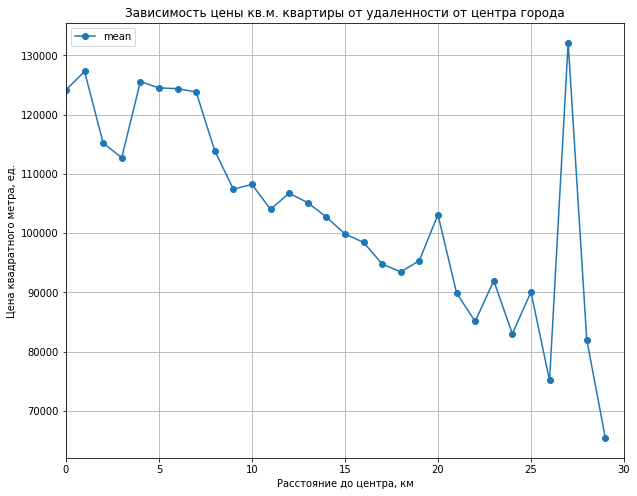

In [64]:
nearest_price_ratio.plot(x='cityCenters_nearest_km', y='mean', style='o-', xlim=(0, 30), grid=True, figsize=(10, 8))
plt.ylabel('Цена квадратного метра, ед.')
plt.xlabel('Расстояние до центра, км')
plt.title('Зависимость цены кв.м. квартиры от удаленности от центра города')
plt.show()

Рассмотрим выбивающиеся значения на 27 км.

In [65]:
spb_data.query('cityCenters_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price,weekday,month,year,floor_group,living_area_rate,kitchen_area_rate,cityCenters_nearest_km
748,13,14.35,74.0,2017-11-28,2,3.130000,5.0,30.0,3,NaN,...,NaN,128.0,193918,1,11,2017,другой,0.405405,0.337838,27
5951,6,2.25,32.0,2018-02-27,1,2.781148,2.0,16.5,2,NaN,...,NaN,178.0,70312,1,2,2018,последний,0.515625,0.218750,27


Из-за малого количества объявлений (всего 2) и наличия среди них очень дорогого жилья, на графике видно выбивающееся значение.

На графике видно сильное изменение в цене между 7 и 8 км: разница составляет почти 10 тысяч. Т.к. средняя цена 8 км выше средней цены 4 км, то ограничим им центральную зону: примем за центральную зону область в радиусе 8 км от центра города.

### Вывод

Выделили квартиры в Санкт-Петербурге и построили график зависимости цены от удалённости квартиры от центра города. Определили центральную зону - область в радиусе 8 км от центра.

#### Анализ квартир в центре города

Выделим сегмент квартир в центре.

In [66]:
center = spb_data.query('cityCenters_nearest_km < 9')
center.head()                    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price,weekday,month,year,floor_group,living_area_rate,kitchen_area_rate,cityCenters_nearest_km
4,2,10.00,100.0,2018-06-19,2,3.030000,14.0,32.0,13,NaN,...,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,8
24,8,6.50,97.2,2015-10-31,2,2.855155,3.0,46.5,1,NaN,...,124.0,265.0,66872,5,10,2015,первый,0.478395,0.201646,2
35,6,15.50,149.0,2017-06-26,5,2.696740,5.0,104.0,4,NaN,...,779.0,644.0,104026,0,6,2017,другой,0.697987,0.114094,3
61,18,7.99,74.0,2017-08-24,2,2.927399,4.0,43.0,4,NaN,...,NaN,609.0,107972,3,8,2017,последний,0.581081,0.270270,4
63,2,20.00,118.0,2018-09-11,3,3.000000,9.0,68.0,7,NaN,...,779.0,37.0,169491,1,9,2018,другой,0.576271,0.135593,4


Площадь

In [67]:
center['total_area'].describe()

count    2877.000000
mean       71.755242
std        29.979343
min        20.000000
25%        47.800000
50%        67.400000
75%        88.200000
max       197.200000
Name: total_area, dtype: float64

In [68]:
good_data['total_area'].describe()

count    18479.000000
mean        55.077746
std         22.634951
min         20.000000
25%         39.000000
50%         49.700000
75%         65.000000
max        200.000000
Name: total_area, dtype: float64

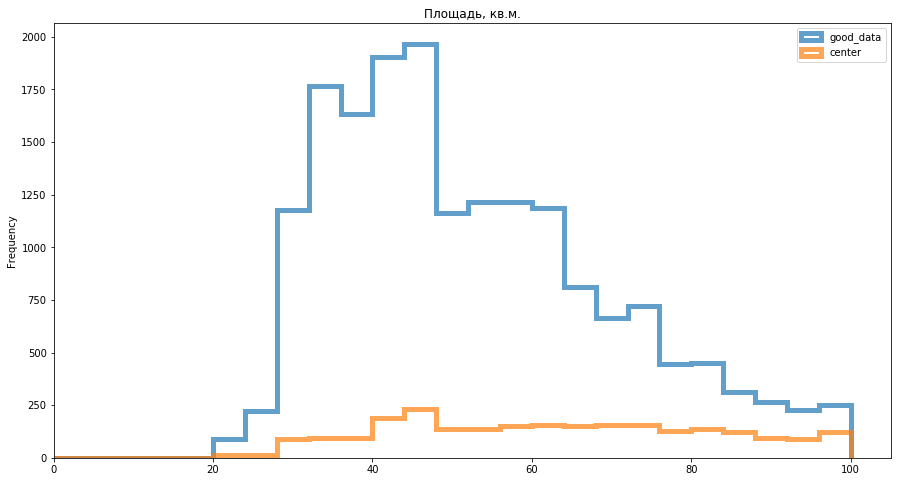

In [69]:
ax = good_data.plot(kind='hist', y='total_area', histtype='step', range=(0, 100), bins=25, linewidth=5, alpha=0.7, label='good_data', grid=True, legend=True, figsize=(15,8), xlim=0)
center.plot(kind='hist', y='total_area', histtype='step', range=(0, 100), bins=25, linewidth=5, alpha=0.7, label='center',  ax=ax)
plt.title('Площадь, кв.м.')
plt.show()

Средняя площадь квартиры в центре города выше, чем в целом по городу: 72 и 55 квадратных метра соответственно. В городе площадь большинства продаваемых квартир находится в диапазоне от 30 до 50 квадратных метров, для центральной же зоны нет большой разницы по площади: очень близко количество квартир площадью от 30 до 100 квадратных метра (пик около 50 кв.м. очень низкий).

Цена квадратного метра

In [70]:
center['price'].describe()

count      2877.000000
mean     120943.740355
std       35509.137146
min       15345.000000
25%       96289.000000
50%      114337.000000
75%      138705.000000
max      392354.000000
Name: price, dtype: float64

In [71]:
good_data['price'].describe()

count     18479.000000
mean      94371.172195
std       30727.820361
min       10507.000000
25%       76213.500000
50%       93333.000000
75%      110267.000000
max      392354.000000
Name: price, dtype: float64

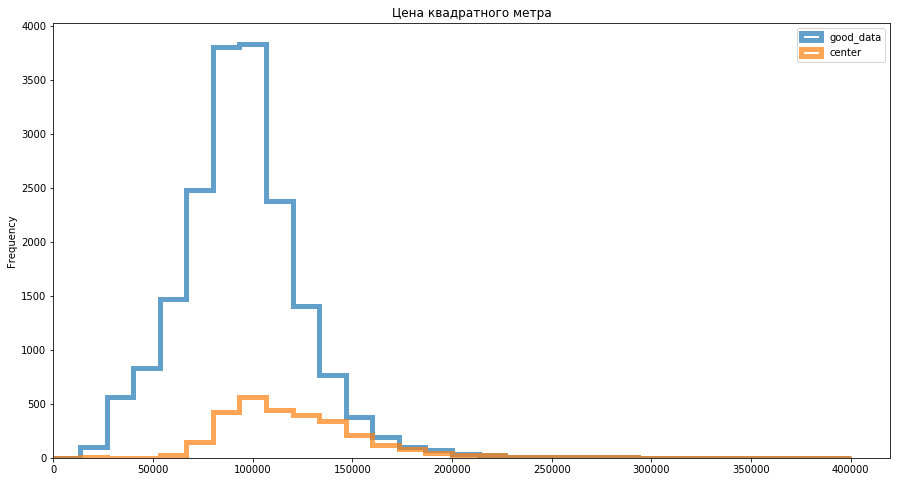

In [72]:
ax = good_data.plot(kind='hist', y='price', histtype='step', range=(0, 400000), bins=30, linewidth=5, alpha=0.7, label='good_data', grid=True, legend=True, figsize=(15,8), xlim=0)
center.plot(kind='hist', y='price', histtype='step', range=(0, 400000), bins=30, linewidth=5, alpha=0.7, label='center',  ax=ax)
plt.title('Цена квадратного метра')
plt.show()

Цена квадратного метра квартиры в центре города значительно выше, чем в целом по городу: 120944 и 94371 соответственно. На гистограмме видно, что пики обоих графиков находятся около 100000, но для центральной зоны практически нет квартир до 50000. При этом правые части гистограмм после 150000 пересекаются, т.е. большинство самых дорогих квартир находится в центре города.

Число комнат

In [73]:
center['rooms'].describe()

count    2877.000000
mean        2.441084
std         1.113088
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

In [74]:
good_data['rooms'].describe()

count    18479.000000
mean         1.954543
std          0.949699
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

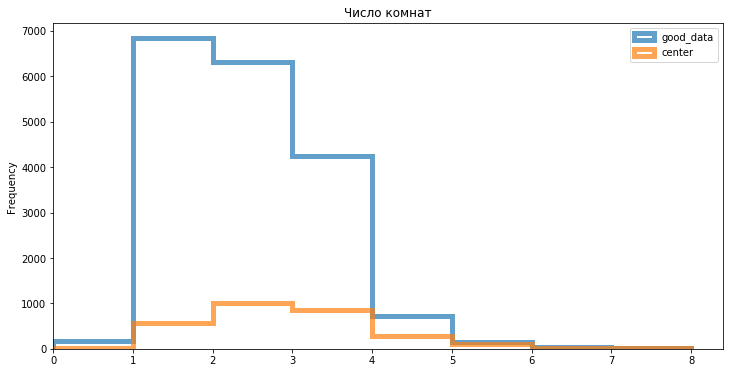

In [75]:
ax = good_data.plot(kind='hist', y='rooms', histtype='step', range=(0, 8), bins=8, linewidth=5, alpha=0.7, label='good_data', grid=True, legend=True, figsize=(12,6), xlim=0)
center.plot(kind='hist', y='rooms', histtype='step', range=(0, 8), bins=8, linewidth=5, alpha=0.7, label='center',  ax=ax)
plt.title('Число комнат')
plt.show()

Большинство квартир в центре двухкомнатные, в отличии от общегородской популярности однокомнатных квартир. При этом трехкомнатных квартир даже больше, чем однокомнатных. Большинство квартир с количеством комнат больше 5 находятся в центре города.

Высота потолков

In [76]:
center['ceiling_height'].describe()

count    2877.000000
mean        2.897263
std         0.271450
min         2.400000
25%         2.696740
50%         2.840826
75%         3.049818
max         3.800000
Name: ceiling_height, dtype: float64

In [77]:
good_data['ceiling_height'].describe()

count    18479.000000
mean         2.704034
std          0.183458
min          2.400000
25%          2.580204
50%          2.696740
75%          2.750000
max          3.800000
Name: ceiling_height, dtype: float64

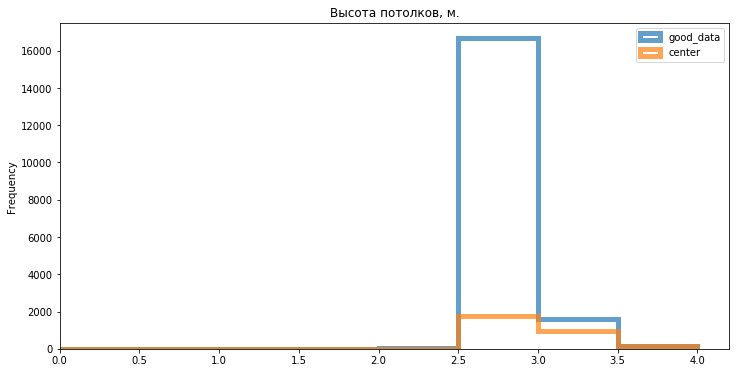

In [78]:
ax = good_data.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 4), bins=8, linewidth=5, alpha=0.7, label='good_data', grid=True, legend=True, figsize=(12,6), xlim=0)
center.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 4), bins=8, linewidth=5, alpha=0.7, label='center',  ax=ax)
plt.title('Высота потолков, м.')
plt.show()

Среднее значение высотры потолков в центре выше, чем в целом по городу: 2,9 и 2,7 соответственно. Большинство квартир с высокими потолками находятся в центре города.

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Число комнат

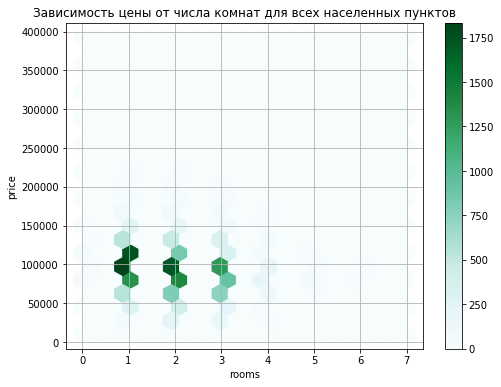

In [79]:
good_data.plot(x='rooms', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.title('Зависимость цены от числа комнат для всех населенных пунктов')
plt.show()

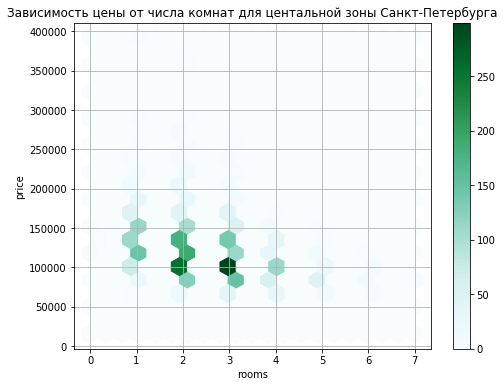

In [80]:
center.plot(x='rooms', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.title('Зависимость цены от числа комнат для центальной зоны Санкт-Петербурга')
plt.show()

In [81]:
center['price'].corr(center['rooms'])

-0.3396408946054971

Коэффициент корреляции для количества комнат и цены для всех таблицы  -0.14, при этом в центре города он составляет -0,34. Можно говорить, что при увеличении числа комнат в квартире, находящейся в центре города, цена квадратного метра квартиры уменьшается.

Этаж

In [82]:
good_data.groupby(['floor_group'])['price'].agg(['mean','median', 'count'])

,mean,median,count
floor_group,,,
другой,97844.779206,96363.0,13773
первый,80366.902428,80448.5,2224
последний,87644.140210,87111.0,2482


In [83]:
center.groupby(['floor_group'])['price'].agg(['mean','median', 'count'])

,mean,median,count
floor_group,,,
другой,123839.920735,119047,2069
первый,109281.272997,102500,337
последний,116565.936306,108436,471


Для квартир в центральной зоне также как и для всех квартир свойственно следующее: самые дешевые квартиры на первом этаже, на втором месте по цене - квартиры на последнем этаже, самые дорогие - на других этажах. 

Удалённость от центра

In [84]:
center['price'].corr(center['cityCenters_nearest'])

-0.026231176763780548

In [85]:
good_data['price'].corr(center['cityCenters_nearest'])

-0.026231176763780548

Коэффициент корреляции удаленности от центра и цены на квадратный метр не изменился.

Дата размещения объявления

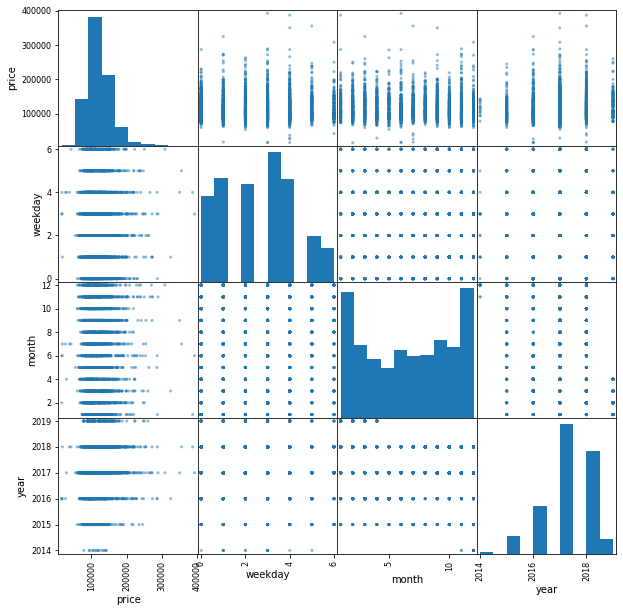

In [86]:
pd.plotting.scatter_matrix(center[['price', 'weekday', 'month', 'year']], figsize=(10, 10))
plt.show()

In [87]:
center[['price', 'weekday', 'month', 'year']].corr()[['price']]

,price
price,1.000000
weekday,0.007448
month,-0.009587
year,0.088403


Цена квадратного метра не зависит от даты размещения объявления.

### Вывод

Квартиры в центре города значительно дороже и больше по площади, чем в целом по городу. Квартиры с площадью 50 кв.м. встречаются также же часто как и с 80 кв.м., чего не скажешь об общих данных: там явно распространены маленькие квартиры с площадью от 30 до 50 кв.м. По числу комнат квартиры в центре также превышают показатели общие. То же самое можно сказать о высоте потолков. К тому же большинство квартир с количеством комнат больше 5 находятся в центре города. Это может быть обусловлено особенностями застройки исторической части города: квартиры старого фонда, сталинки. К тому же жизнь в центре города всегда дороже, чем на окраине.  

На стоимость квадратного метра больше всего влияет удаленность от центра города и то, на каком этаже расположена квартира: первом, последнем или другом. В отличии от общих данных, на стоимость квадратного метра влияет количество комнат: при увеличении числа комнат в квартире, находящейся в центре города, цена квадратного метра квартиры уменьшается.

### Шаг 5. Общий вывод

Средняя квартира в продаже имеет следующие характеристики: двухкомнатная квартира площадью 53 кв.м., с высотой потолков 2,7 метров, проданная по цене 4,65 миллионов. Для центра Санкт-Петербурга средние показатели выше: двухкомнатная квартира площадью 67,4 кв.м., с высотой потолков 2,84 метров, проданная по цене 7.6 миллионов.   

Чаще всего продажа квартиры занимает - 95 дней. При этом больше 500 дней - необычно долгие продажи, до 5 - очень быстрые. 

На стоимость квадратного метра больше всего влияет удаленность от центра города и то, на каком этаже расположена квартира: первом, последнем или другом. Чем дальше квартира от центра, тем меньше ее стоимость: коэффициент корреляции -0,36.
Квартиры на первом этаже самые дешевые, на втором месте по стоимости - квартиры на последнем этаже, самые дорогие - на других этажах.  

Самое большое количество объявлений и самая большая средняя стоимость квадратного метра относится к Санкт-Петербургу. На втором месте - город Пушкин. В Санкт-Петербурге располагаются самые дорогие и одни из самых дешевых квартир. Это говорит об очень широком диапазоне цен в данном городе, который зависит от удаленности квартиры от центра города.   

Для квартир в центральной зоне также как и для всех квартир свойственно следующее: самые дешевые квартиры на первом этаже, на втором месте по цене - квартиры на последнем этаже, самые дорогие - на других этажах. Отличие составляет, то что при увеличении числа комнат в квартире, находящейся в центре города, цена квадратного метра квартиры уменьшается. Коэффициент корреляции этих значений для центра города значительнее, чем для всех населенных пунктов.

Вопросы для работы в команде: возможность установления значения по умолчанию количество балконов = 0 при ручном заполнении объявления; появление пропусков в столбце *locality_name* и в столбцах, данные которых получены автоматически на основе картографических данных; решение проблемы с разными наименованиями населенных пунктов. 